<img src="./images/logo-ensae.jpg" width = 40%><img src="./images/logo-ipparis.jpg" width = 30%>

**"Statistical Analysis of Network Data with applications in Marketing", S2 2018-19** 
# *Fake News Network Analysis* - R Code  

**Santiago CÓRDOBA MUÑOZ**, *Mastère Spécialisé Data Science, ENSAE ParisTech*  
**Yosuke IJIRI**, *Mastère Spécialisé Data Science, ENSAE ParisTech*  

## Overview
1. Data Preparation  
2. Descriptive Analysis

## 1. Data Preparation

In [70]:
#install.packages("igraph")
#install.packages("jpeg")
library(igraph, warn.conflicts = FALSE)
library(stringr)
library(jpeg)

- **PolitiFact_real_news_content.csv**  
(Unfortunately, "PolitiFact_fake_news_content.csv" was not the correct dataset.)

[1] 120

[1] "id"             "title"          "text"           "url"           
 [5] "top_img"        "authors"        "source"         "publish_date"  
 [9] "movies"         "images"         "canonical_link" "meta_data"

News ID publish_date            
2 10      {'$date': 1474948336000}

title:

[1] Famous dog killed in spot she waited a year for her owner to return to! [VIDEO]
114 Levels: 'Locked the black bitch out': White students under investigation after racist Snapchat reveals campus harassment ...

text:Famous dog killed in spot she waited a year for her owner to return to! [VIDEO]

Animal lovers, get your tissues ready, because you are about to bawl your eyes out, especially if you are a dog lover.

You know what? Don’t even read further if you are part of the man’s best friend club, you just might regret your decision to get out of bed this morning. News just hit the web that the locally famous three year-old dog named Loung, who fell out of a truck last year, landing on a busy route between Cambodia and Thailand, has been hit and killed by a car as it waited for the return of its owner for over a year.

You can start the waterworks as we go into the details. The Sukhumvit Road, or Thailand Route 3, is a leading highway between Bangkok and Cambodia and Loung’s owner must not have realized that she had fallen right out of the truck. What’s truly amazing is that the dog refused to leave the area, hoping that one day her owner would return and rescue her.

× 101 Things All Young A

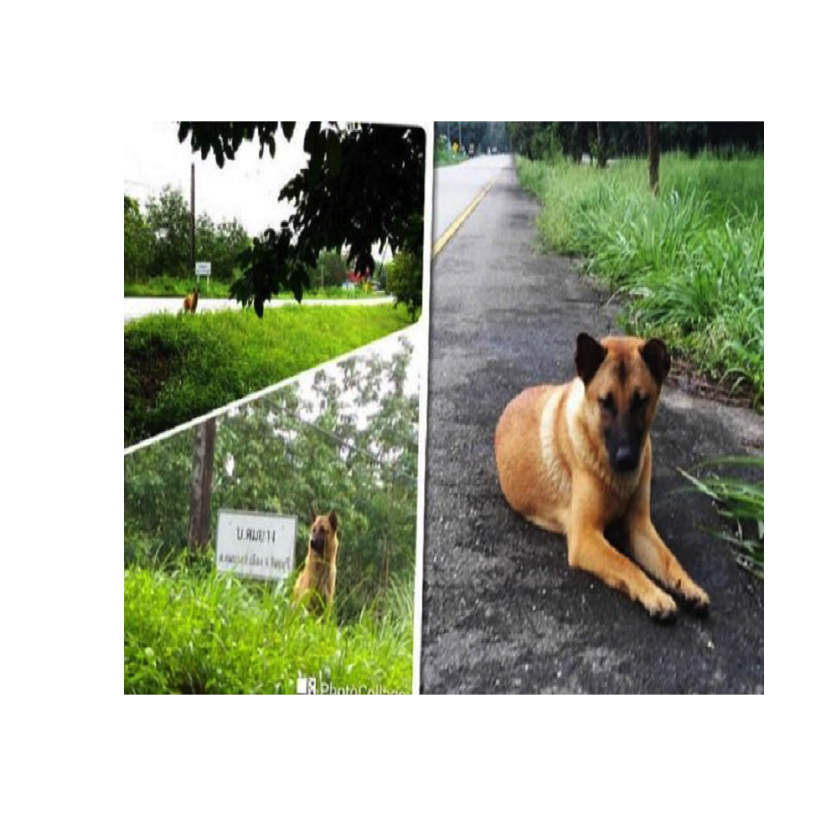

In [101]:
# Read the file and add a column of News ID
content <- read.csv("./fakenewsnet/PolitiFact_real_news_content.csv", header=TRUE)
nrow(content)
names(content)
content["News ID"] <- NA
content <- content[c('id', 'News ID', 'title', 'text', 'url',
                     'top_img', 'authors', 'source', 'publish_date', 'movies',
                     'images', 'canonical_link', 'meta_data')]
content["News ID"] <- sapply(content$id, function(x){return (as.numeric(str_extract(x, "[0-9.]+")))})

# Search for a record of News ID = id
id <- 10  # Choose a News ID of your choice
content[which(content[,2] == id), c(2, 9)]
cat("title:")
content[which(content[,2] == id), 3]
cat("text:")
cat(toString(content[which(content[,2] == id), 4]))
img_path <- toString(content[which(content[,2] == id), 6])
download.file(img_path,'./images/sample.jpg', mode = 'wb')
jj <- readJPEG("./images/sample.jpg",native=TRUE)
plot(0:1,0:1,type="n",ann=FALSE,axes=FALSE)
rasterImage(jj,0,0,1,1)

- **PolitiFactUser.txt**

In [103]:
# User data: row num = index
users <- read.table("./fakenewsnet/PolitiFactUser.txt", header=FALSE)
cat("Number of User IDs:", nrow(users), "\n")
cat("Number of unique User IDs:", nrow(unique(users)))
users["ID"] <- NA 
users$ID <- seq(1, nrow(users))
users <- users[c("ID", "V1")]
head(users, 5)

Number of User IDs: 23865 
Number of unique User IDs: 23865

ID V1                              
1 1  f4b46be21c2f553811cc8a73c4f0ff05
2 2  2ced3734cc9c164edd9a8f5fbebe976f
3 3  c84c4ea8ba67211f84781bdd64cafe43
4 4  1776d1765f5e82cd660d8d502f227402
5 5  4e8c2c300d96929895ce0edba915af16

- **PolitiFactNews.txt**

In [104]:
# e.g. ‘PolitiFact_Real_1' is in the 1st row, so it's corresponding to index 1.
news <- read.table("./fakenewsnet/PolitiFactNews.txt", header=FALSE)
cat("Number of real news:", sum(grepl("PolitiFact_Real", news[,1])), "\n")
cat("Number of fake news:", sum(grepl("PolitiFact_Fake", news[,1])))
news["ID"] <- NA 
news$ID <- seq(1, nrow(news))
news <- news[c("ID", "V1")]
head(news, 5)

Number of real news: 120 
Number of fake news: 120

ID V1               
1 1  PolitiFact_Real_1
2 2  PolitiFact_Real_2
3 3  PolitiFact_Real_3
4 4  PolitiFact_Real_4
5 5  PolitiFact_Real_5

**PolitiFactNewsUser.txt**

In [105]:
# e.g. '240 1 1' means news 240 is posted/spreaded by user 1 for 1 time.
newsuser <- read.table("./fakenewsnet/PolitiFactNewsUser.txt", header=FALSE)
cat("Number of rows:", nrow(newsuser))
newsuser["Real/Fake"] <- NA
newsuser <- newsuser[c("V1", "Real/Fake", "V2", "V3")]
names(newsuser) <- c("News ID", "Real/Fake", "User ID", "Number of Posts")

# Add a column of Real/Fake for the corresponding News IDs
for(i in 1:nrow(newsuser)){
    if (grepl("Real", news[newsuser[i,1],2])){
        newsuser[i, "Real/Fake"] <- "Real"}
    else {
        newsuser[i, "Real/Fake"] <- "Fake"}
    }

head(newsuser, 5)

Number of rows: 32791

News ID Real/Fake User ID Number of Posts
1 240     Fake      1       1              
2 124     Fake      2       1              
3 162     Fake      3       1              
4 233     Fake      4       1              
5  50     Real      5       1

- Simple statistics of newsuser data

In [107]:
# Do some simple analysis of the newsuser data here (e.g. Who spreads fake news the most, etc.)


**PolitiFactUserUser.txt**

In [4]:
# Read the follower/following properties (edge list) for the PolitiFact data.
# e.g. ’1589 1' means user 1589 is following user 1
edge_list <- read.table("./fakenewsnet/PolitiFactUserUser.txt", header=FALSE)
head(edge_list, 5)

V1    V2
1   507 1 
2  1589 1 
3  5307 1 
4 11421 1 
5 13267 1

In [33]:
# Read the list as the igraph format
g <- graph.data.frame(edge_list, directed=TRUE)

## 2. Descriptive Analysis

In [15]:
# To check if our graph is simple, meaning absence of loops and multi-edges
is.simple(g)

[1] FALSE

In [16]:
# Remove redundant edges and looping edges.
g <- simplify(g, remove.multiple=T, remove.loops=T)
is.simple(g)

[1] TRUE

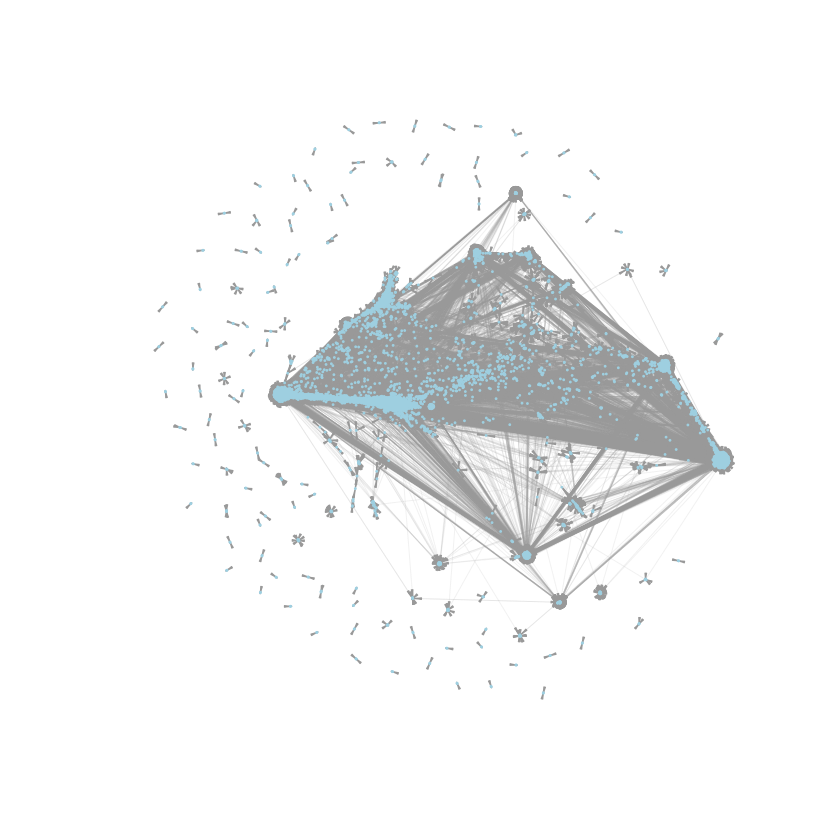

In [9]:
# Plot the graph
plot(g, vertex.label=NA, vertex.size=1, vertex.frame.color=NA, edge.width=0.1, edge.arrow.size=0.3, edge.arrow.width=0.3, vertex.color="lightblue", layout=layout_nicely)

In [10]:
# To check the Edge sequence
E(g)

+ 574742/574742 edges from b072d0d (vertex names):
 [1] 507 ->21496 507 ->11647 507 ->5169  507 ->1     1589->22982 1589->488  
 [7] 1589->1210  1589->1133  1589->2090  1589->14523 1589->18025 1589->19895
[13] 1589->15013 1589->3731  1589->7480  1589->10072 1589->6057  1589->16866
[19] 1589->19005 1589->22985 1589->21195 1589->22637 1589->16246 1589->14309
[25] 1589->6787  1589->6977  1589->9863  1589->10356 1589->12071 1589->12584
[31] 1589->17392 1589->19134 1589->19470 1589->20639 1589->22672 1589->23581
[37] 1589->727   1589->2856  1589->3903  1589->10034 1589->10692 1589->10714
[43] 1589->10881 1589->11552 1589->13583 1589->13899 1589->14541 1589->14547
[49] 1589->15941 1589->19676 1589->21713 1589->21952 1589->23852 1589->18695
[55] 1589->3283  1589->13208 1589->4233  1589->5657  1589->6697  1589->11789
+ ... omitted several edges

In [11]:
# To create the matrix of the network
g[]

   [[ suppressing 32 column names ‘507’, ‘1589’, ‘5307’ ... ]]
   [[ suppressing 32 column names ‘507’, ‘1589’, ‘5307’ ... ]]
   [[ suppressing 32 column names ‘507’, ‘1589’, ‘5307’ ... ]]


23865 x 23865 sparse Matrix of class "dgCMatrix"
                                                                            
507   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
1589  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
5307  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
11421 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
13267 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
20571 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
1205  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
2631  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
8114  . . . . . . . . . . . . . 1 . . . . . . . . . . . . . 1 . . . . ......
10429 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
15442 . . . . . . . . . . . 1 . 1 1 . . . . . . . . . . . . . . . . . ......
17464 . . . . . . . . 1 . .

In [12]:
#To check the attributes of the edges
edge_attr(g)
vertex_attr(g)

named list()

$name
    [1] "507"   "1589"  "5307"  "11421" "13267" "20571" "1205"  "2631"  "8114" 
   [10] "10429" "15442" "17464" "19399" "19991" "20371" "22113" "23687" "698"  
   [19] "2541"  "4043"  "4782"  "5250"  "5737"  "8017"  "8291"  "8776"  "8891" 
   [28] "8895"  "9115"  "9988"  "11176" "11238" "11450" "11658" "11661" "12184"
   [37] "12731" "13156" "13384" "13591" "13822" "14150" "15021" "15067" "15465"
   [46] "15492" "15802" "16027" "16092" "16273" "18168" "18804" "19166" "20037"
   [55] "21055" "21128" "21335" "21392" "21487" "22730" "22982" "2178"  "2685" 
   [64] "2694"  "4821"  "4920"  "8731"  "9616"  "10344" "11092" "11901" "12735"
   [73] "13322" "13794" "14066" "16218" "16502" "17724" "19116" "19556" "20642"
   [82] "20750" "21638" "23559" "2770"  "4722"  "5219"  "5366"  "5742"  "8299" 
   [91] "10974" "11222" "17247" "20137" "22949" "23769" "14369" "356"   "1798" 
  [100] "2008"  "2285"  "3402"  "5297"  "5829"  "5938"  "7824"  "9638"  "12720"
  [109] "13027" "15358" "15637" "16390" "20542" "21359" "22521" "22819" "23204"
  [118] "23630" "5"     "2912"  "11370" "16028" "16629" "429"   "488"   "612"  
  [127] "665"   "1210"  "1377"  "1683"  "2379"  "3441"  "3671"  "4338"  "4771" 
  [136] "4814"  "5272"  "5315"  "7157"  "7434"  "8263"  "8332"  "8545"  "8571" 
  [145] "8896"  "9885"  "10357" "10493" "10921" "10945" "10959" "11081" "11088"
  [154] "11451" "11601" "11655" "11956" "13073" "13184" "13526" "13715" "13730"
  [163] "13874" "14626" "14780" "15624" "16111" "16596" "16907" "17534" "17621"
  [172] "17983" "18314" "19036" "19317" "20386" "20762" "21389" "21658" "22072"
  [181] "22100" "22602" "23790" "6048"  "948"   "2327"  "164"   "4773"  "5537" 
  [190] "7698"  "7759"  "10156" "13240" "15477" "16561" "18648" "19174" "20264"
  [199] "20332" "472"   "527"   "543"   "862"   "975"   "1133"  "1247"  "1473" 
  [208] "1508"  "1518"  "1645"  "1893"  "1943"  "2080"  "2090"  "2345"  "2406" 
  [217] "2574"  "2652"  "2676"  "3086"  "3120"  "3178"  "3194"  "3274"  "3691" 
  [226] "3712"  "4108"  "4118"  "4198"  "4339"  "4522"  "4523"  "4688"  "4933" 
  [235] "5270"  "5471"  "5578"  "5580"  "5597"  "5781"  "5826"  "6036"  "6118" 
  [244] "6208"  "6561"  "6717"  "6838"  "6884"  "7211"  "7282"  "7540"  "7720" 
  [253] "7735"  "8243"  "8435"  "8461"  "8914"  "9079"  "9126"  "9138"  "9146" 
  [262] "9309"  "9395"  "9397"  "9473"  "9647"  "9799"  "9890"  "10075" "10289"
  [271] "10331" "10402" "10891" "11218" "11243" "11261" "11264" "11365" "11375"
  [280] "11575" "11848" "11869" "11950" "12057" "12231" "12247" "12333" "12466"
  [289] "12568" "12579" "12632" "12888" "13252" "13278" "13287" "13858" "14065"
  [298] "14169" "14173" "14513" "14523" "14727" "14977" "15088" "15535" "15611"
  [307] "15667" "15704" "15846" "16007" "16024" "16139" "16207" "16758" "16979"
  [316] "17210" "17230" "17411" "17461" "17510" "17706" "17789" "17995" "18025"
  [325] "18096" "18339" "18367" "18809" "18820" "18872" "19239" "19541" "19646"
  [334] "19867" "19895" "19946" "20031" "20100" "20362" "20514" "20565" "20646"
  [343] "20830" "20904" "20947" "21004" "21263" "21441" "21700" "21842" "22224"
  [352] "22226" "22241" "22396" "22560" "22788" "22917" "22926" "22927" "23104"
  [361] "23113" "23147" "23296" "23409" "23471" "23599" "23649" "1620"  "3129" 
  [370] "12952" "7496"  "11534" "15013" "6324"  "7857"  "4303"  "4691"  "6750" 
  [379] "9154"  "14822" "13771" "16084" "335"   "360"   "601"   "714"   "871"  
  [388] "1088"  "1743"  "2071"  "2363"  "2403"  "2442"  "3720"  "3731"  "3892" 
  [397] "3993"  "4436"  "4474"  "4602"  "4768"  "4839"  "4865"  "5351"  "5582" 
  [406] "5613"  "5916"  "6007"  "6101"  "6766"  "7139"  "7202"  "7330"  "7480" 
  [415] "8397"  "8604"  "8858"  "8879"  "8898"  "9159"  "9931"  "10072" "10085"
  [424] "10146" "10532" "10576" "10953" "11717" "11907" "12099" "12173" "12235"
  [433] "12263" "13181" "13429" "13551" "13568" "13725" "13757" "13952" "14231"
  [442] "14460" "14792" "14814" "16166" "16321" "16542" "17041" "17584" "1

In [17]:
# To check if the graph is weighted
is.weighted(g)

[1] FALSE

In [20]:
# To check if it is connected, meaning if every vertex is reachable from every other.
is.connected(g)

[1] FALSE

In [22]:
# To check if it is strongly connected, It is called strongly connected 
#if every vertex v is reachable from every u by a directed walk.
is.connected(g,mode="strong")

[1] FALSE

In [21]:
# To check if it is weakly connected, it means if its underlying graph
# (i.e., the result of stripping away the labels `tail' and `head' from G) is
# connected
is.connected(g,mode="weak")

[1] FALSE

In [23]:
# To see the diameter of the graph. The value of the longest distance in a graph is called the diameter of the
#graph.
diameter(g)

[1] 14

In [24]:
# To get the adjency matrix
get.adjacency(g)

   [[ suppressing 32 column names ‘507’, ‘1589’, ‘5307’ ... ]]
   [[ suppressing 32 column names ‘507’, ‘1589’, ‘5307’ ... ]]
   [[ suppressing 32 column names ‘507’, ‘1589’, ‘5307’ ... ]]


23865 x 23865 sparse Matrix of class "dgCMatrix"
                                                                            
507   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
1589  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
5307  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
11421 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
13267 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
20571 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
1205  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
2631  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
8114  . . . . . . . . . . . . . 1 . . . . . . . . . . . . . 1 . . . . ......
10429 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
15442 . . . . . . . . . . . 1 . 1 1 . . . . . . . . . . . . . . . . . ......
17464 . . . . . . . . 1 . .

In [ ]:
######### I don't see a particular use to the below part##################
#--------------------------------------------------------------------------
# Histogram of the degree is the number of vertices in V incident to v.
hist(degree(g), col="lightblue",xlab="Vertex Degree",ylab="Frequency",main="")

# Histrogram of the strenght
hist(graph.strength(g), col="pink", xlab="Vertex Strength",ylab="Frequency",main="")
#----------------------------------------------------------------------------
install.packages("sna")
install.packages("network")
library(sna)
library(network)

A <- get.adjacency(g)

# It doesn't run in my computer, problems of allocation size.
ga <- as.network.matrix(A)

# To do a graph of centrality, we need ga in order to run it
gplot.target(g,degree(g),main="Degree",circ.lab = FALSE, circ.col="skyblue",usearrows = FALSE,ertex.col=c("blue",rep("red",32),"yellow"),edge.col="darkgray")


In [32]:
gplot.target(g,degree(g),main="Degree",circ.lab = FALSE, circ.col="skyblue",usearrows = FALSE,ertex.col=c("blue",rep("red",32),"yellow"),edge.col="darkgray")

ERROR: Error in FUN(X[[i]], ...): as.edgelist.sna input must be an adjacency matrix/array, edgelist matrix, network, or sparse matrix, or list thereof.



In [ ]:
###########################################
####### Network and node descriptives######
###########################################

# To get the proportion of present edges from all possible edges in the network.
edge_density(g, loops=F)

# To get the proportion of reciprocated ties (for a directed network).
reciprocity(g)
dyad_census(g) # Mutual, asymmetric, and null node pairs


# To get ratio of triangles (direction disregarded) to connected triples.
transitivity(g, type="global") # net is treated as an undirected network

# To get ratio of triangles to connected triples each vertex is part of.
transitivity(g, type="local")


# Node degree
deg <- degree(g, mode="all")
plot(g, vertex.size=deg*3)
hist(deg, breaks=1:vcount(g)-1, main="Histogram of node degree")


# Degree distribution
deg.dist <- degree_distribution(g, cumulative=T, mode="all")
plot( x=0:max(deg), y=1-deg.dist, pch=19, cex=1.2, col="orange",xlab="Degree", ylab="Cumulative Frequency")


# Centralization, and theoretical_max - maximum centralization score for a graph of that size.
degree(g, mode="in")
centr_degree(g, mode="in", normalized=T)



# To get the mean of the shortest distance between each pair of nodes in the network (in both directions for directed graphs)
mean_distance(g, directed=F)
mean_distance(g, directed=T)

# !! Community detection
ceb <- cluster_edge_betweenness(g)
plot(ceb, g)

class(ceb)
# !! number of communities
length(ceb)

# !! community membership for each node
membership(ceb)

# !! High modularity for a partitioning reflects dense connections within communities and sparse
# connections across communities.
modularity(ceb)

## Matching of attributes across connected nodes more than expected by chance
assortativity(net, V(net)$audience.size, directed=F)

## Reference
- Combating Fake News: A Survey on Identification and Mitigation Techniques/
Arizona Board of Regents https://github.com/KaiDMML/FakeNewsNet
- Data Source: Kaggle: FakeNewsNet https://www.kaggle.com/mdepak/fakenewsnet